In [59]:
import os
import pandas as pd

In [60]:
root_path = "../logs_all/tb_logs_24_09_kapi"

In [61]:
filenames = []

for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith(".csv"):
                filename = os.path.join(root, file)
                filenames.append(filename)

filenames = pd.DataFrame(data=filenames)
filenames = filenames.sort_values(by=0)
filenames

,0
100,../logs_all/tb_logs_24_09_kapi/csv_output/Deep...
37,../logs_all/tb_logs_24_09_kapi/csv_output/Deep...
27,../logs_all/tb_logs_24_09_kapi/csv_output/Deep...
61,../logs_all/tb_logs_24_09_kapi/csv_output/Deep...
72,../logs_all/tb_logs_24_09_kapi/csv_output/Deep...
...,...
103,../logs_all/tb_logs_24_09_kapi/csv_output/Tran...
68,../logs_all/tb_logs_24_09_kapi/csv_output/Tran...
16,../logs_all/tb_logs_24_09_kapi/csv_output/Tran...
33,../logs_all/tb_logs_24_09_kapi/csv_output/Tran...


In [62]:
net_names = ["EEGInception", "EEGNet", "Transformer", "DeepConvNet"]
metric_names = [
    'validation_loss',
    'validation_acc',
    'validation_f1',
    
    'train_loss',
    'train_acc',
    'train_f1',
  ]

EEGInception validation_acc max valid acc
0.5841948956251144
0.48680657595396043
0.3983022555708885
0.51897993683815
0.46476058661937714
EEGInception train_acc max valid acc
0.8639563202857972
0.8096199840307235
0.8441610842943191
0.868982994556427
0.8228476077318192
EEGNet validation_acc max valid acc
0.3117946773767471
0.6122340619564056
0.39967683702707285
0.3238393828272819
0.4413890361785889
EEGNet train_acc max valid acc
0.8397997200489045
0.8594677090644837
0.6275096207857132
0.37928166091442106
0.4457516372203827
Transformer validation_acc max valid acc
0.0833333358168602
0.25152986496686935
0.4590608820319176
0.6190903574228287
0.3192131929099559
Transformer train_acc max valid acc
0.23035229742527
0.3675498142838478
0.6392953634262085
0.6527237176895142
0.5426543936133384
DeepConvNet validation_acc max valid acc
0.0833333358168602
0.22585288956761357
0.30657856836915015
0.2833333313465118
0.42582498490810394


/Users/kacper/.pyenv/versions/3.8.16/envs/magisterka/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


DeepConvNet train_acc max valid acc
0.120261438190937
0.33456893265247345
0.47292082756757736
0.5774158835411072
0.2456892281770706


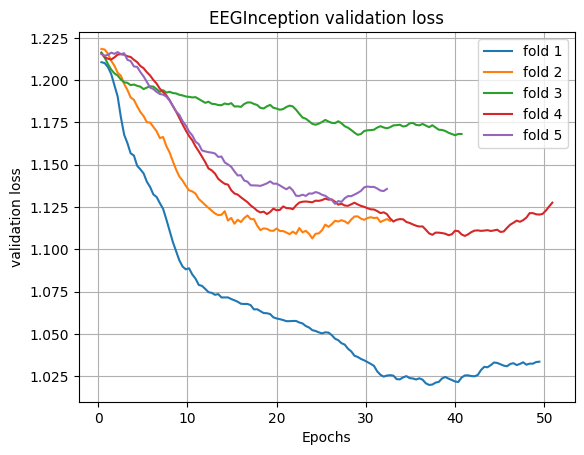

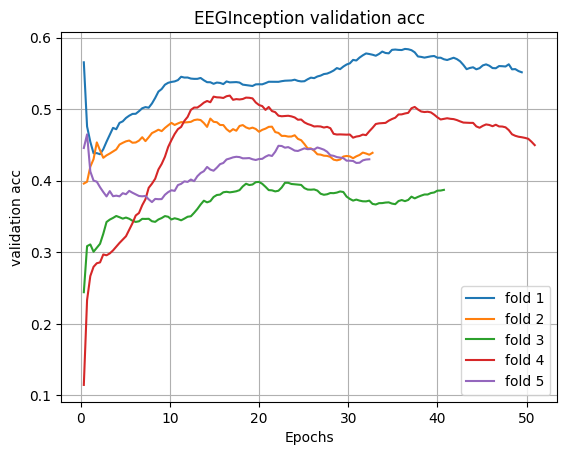

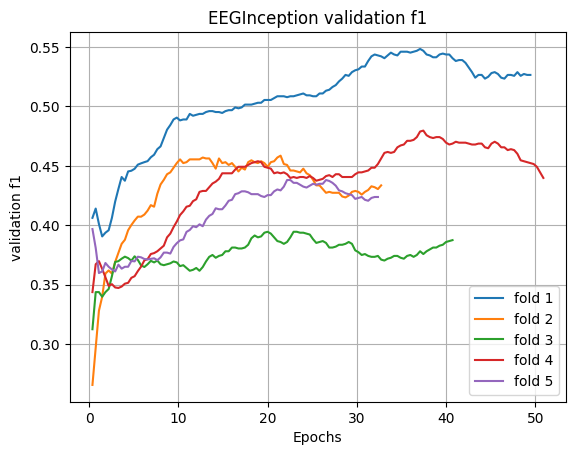

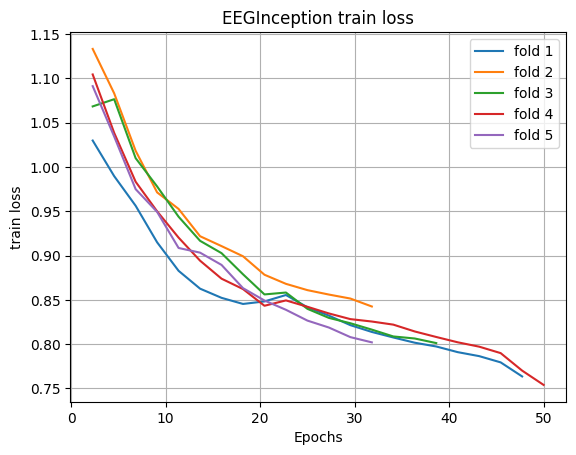

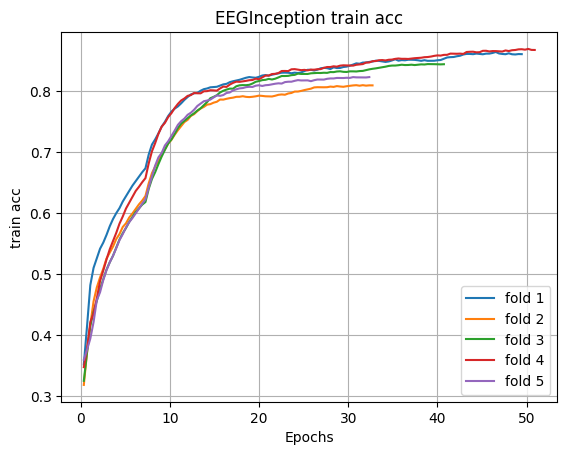

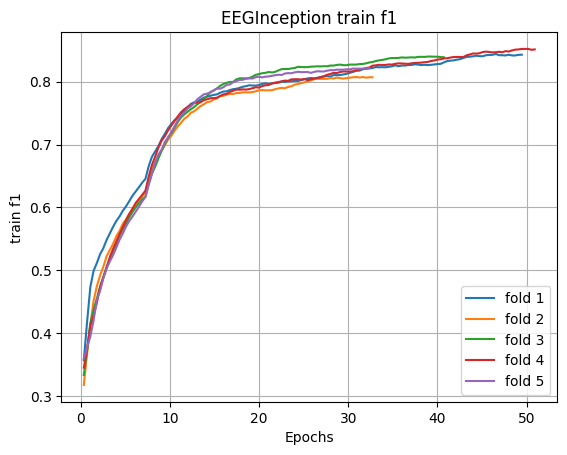

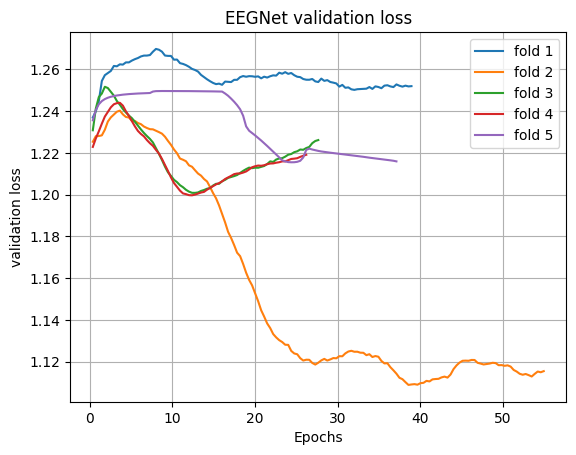

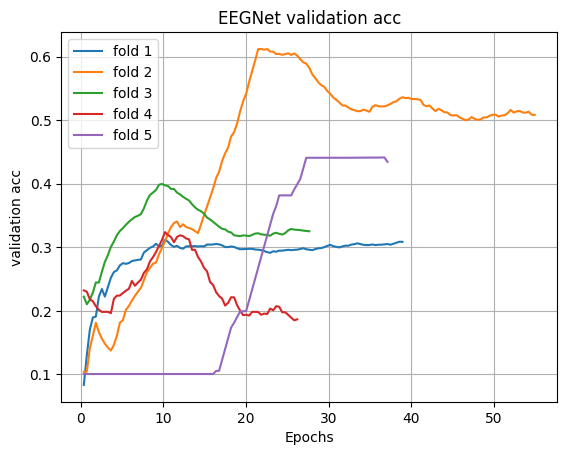

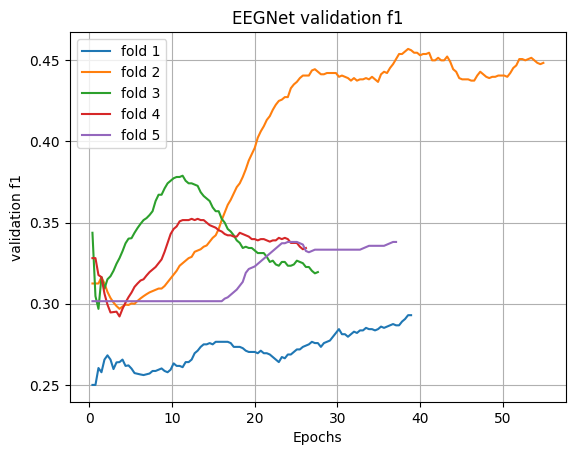

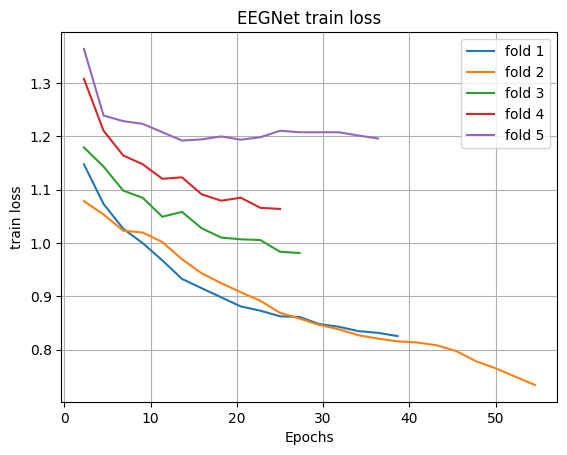

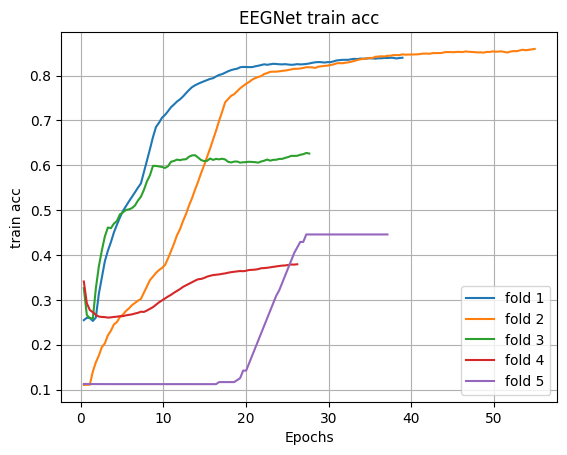

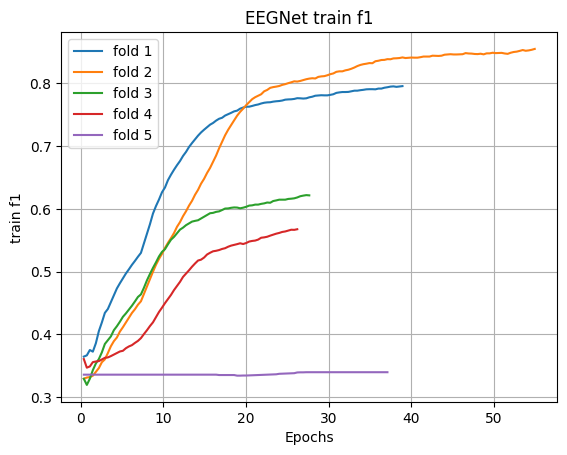

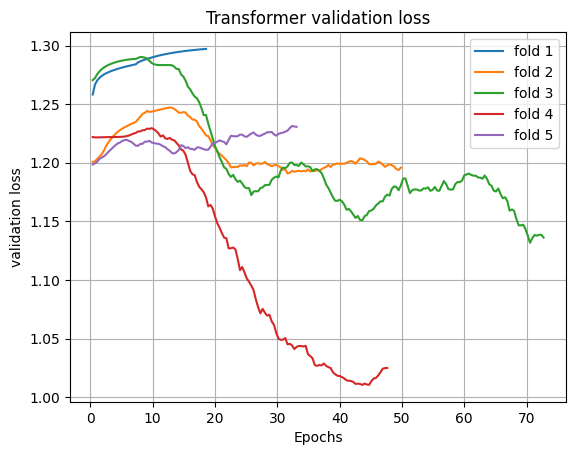

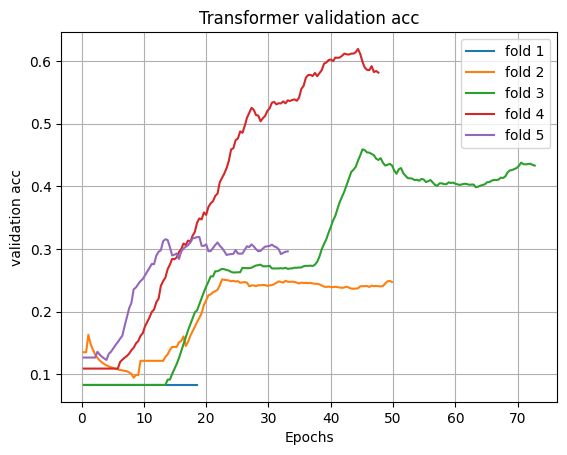

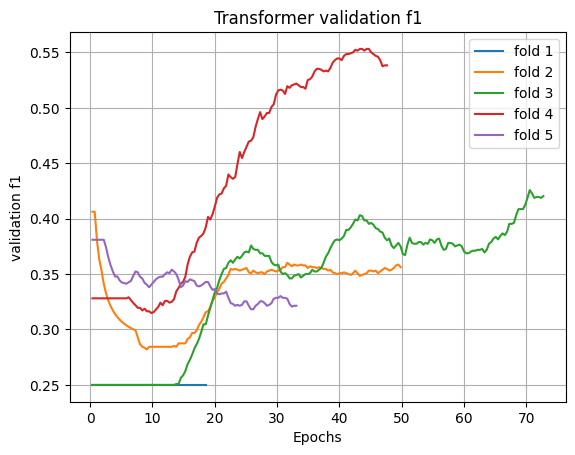

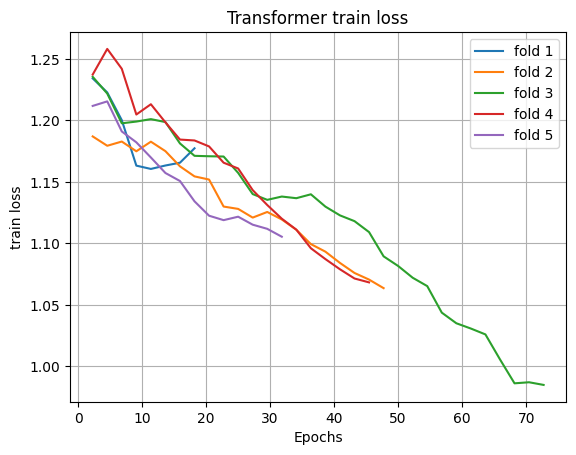

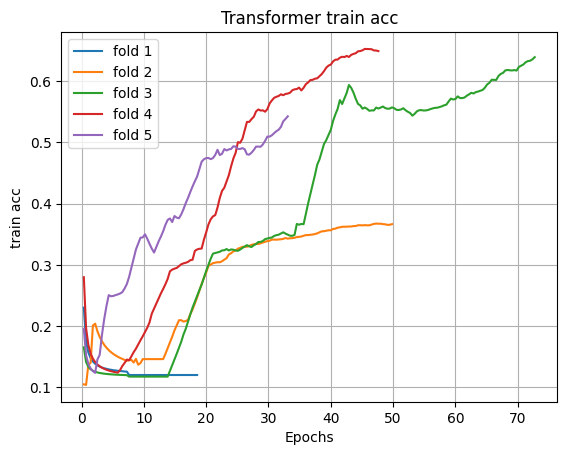

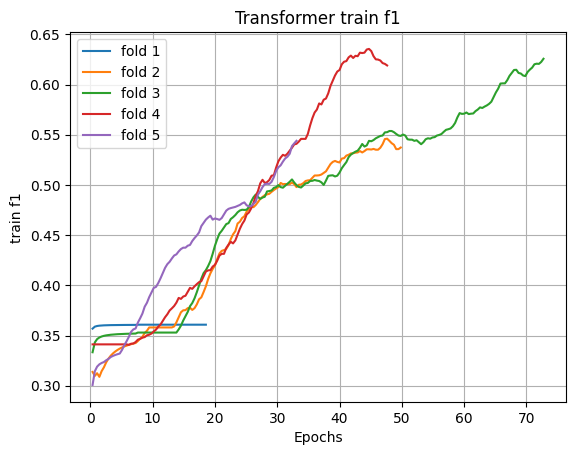

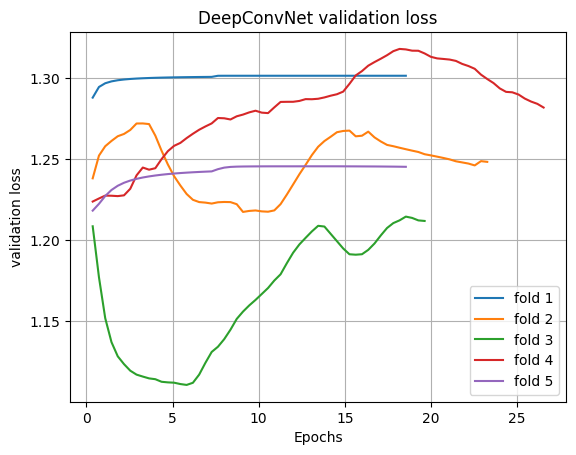

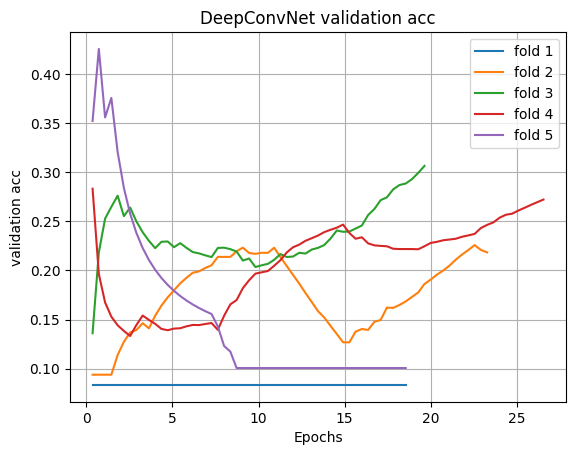

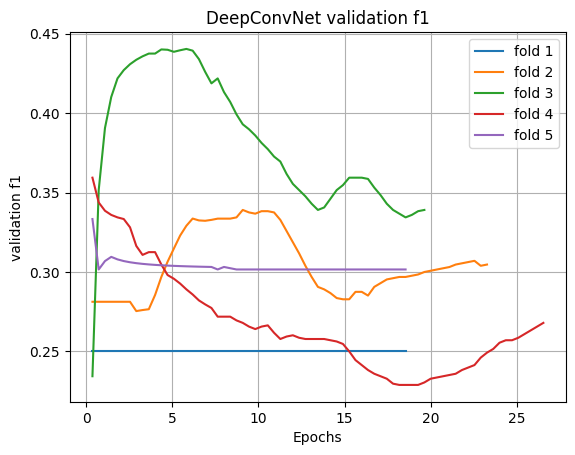

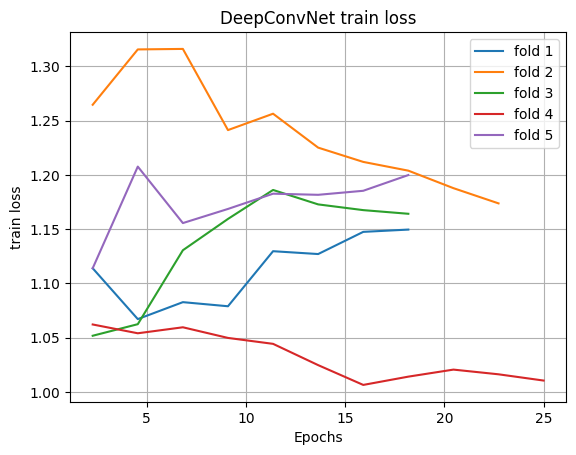

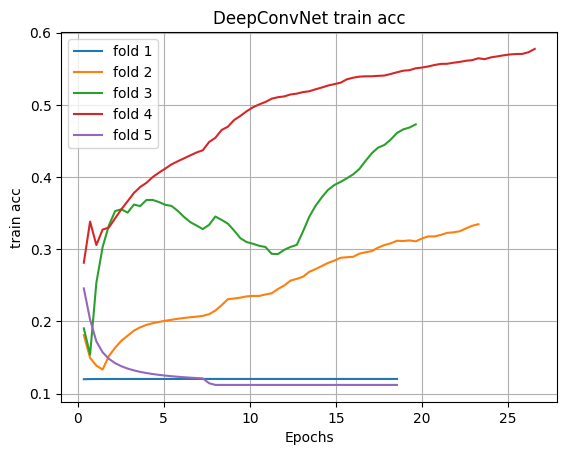

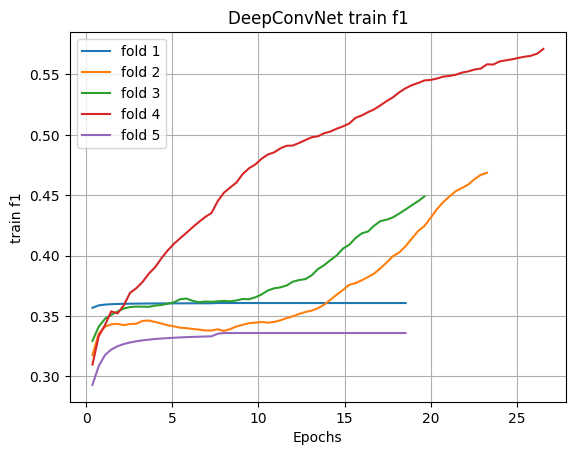

In [63]:
for net_name in net_names:
    df_net_filenames = filenames[filenames[0].str.contains(net_name)]
    for metric_name in metric_names:
        metric_name_label = " ".join(metric_name.split("_"))
        
        df_metric_filenames = df_net_filenames[df_net_filenames[0].str.contains(metric_name)]
        
        if ("acc" in metric_name):
            print(net_name, metric_name, "max valid acc")
            
        df_metric = []
        for i, df_metric_filename in enumerate(df_metric_filenames[0]):
            
            df_value = pd.read_csv(df_metric_filename)[['step','value']]

            df_value[['value']] = df_value[['value']].rolling(20, min_periods=1).mean()

            df_value[['step']] = (df_value[['step']] + 1) / 22

            if ("acc" in metric_name):
                print(df_value.max()['value'])

            df_value = df_value.rename(columns={"value": f"fold {i+1}"})
            df_value = df_value.rename(columns={"step": "epoch"})

            df_value = df_value.set_index('epoch')
            
            df_metric.append(df_value)
            
        df_metric = pd.concat(df_metric, axis=1)
        
        fig = df_metric.plot(
            title=f"{net_name} {metric_name_label}",
            grid=True,
            ylabel=metric_name_label,
            xlabel="Epochs",
        ).get_figure()
        fig.savefig(f"plots/{net_name}_{metric_name}", bbox_inches='tight', pad_inches=0.1)